In [2]:
# importing packages
%matplotlib inline
import pandas as pd
pd.options.display.max_rows = 1000 #handy for showing truncated results
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn import metrics

In [3]:
# importing data
dating = pd.read_csv('Speed_Dating_Data.csv', encoding="ISO-8859-1") # use this encoding, funky error otherwise. thanks kagglers!
dating

iid    id  gender  idg  condtn  wave  round  position  positin1  order  \
0       1   1.0       0    1       1     1     10         7       NaN      4   
1       1   1.0       0    1       1     1     10         7       NaN      3   
2       1   1.0       0    1       1     1     10         7       NaN     10   
3       1   1.0       0    1       1     1     10         7       NaN      5   
4       1   1.0       0    1       1     1     10         7       NaN      7   
5       1   1.0       0    1       1     1     10         7       NaN      6   
6       1   1.0       0    1       1     1     10         7       NaN      1   
7       1   1.0       0    1       1     1     10         7       NaN      2   
8       1   1.0       0    1       1     1     10         7       NaN      8   
9       1   1.0       0    1       1     1     10         7       NaN      9   
10      2   2.0       0    3       1     1     10         3       NaN     10   
11      2   2.0       0    3       1     1     10         3       NaN      9   
12      2   2.0       0    3       1     1     10         3       NaN      6   
13      2   2.0       0    3       1     1     10         3       NaN      1   
14      2   2.0       0    3       1     1     10         3       NaN      3   
15      2   2.0       0    3       1     1     10         3       NaN      2   
16      2   2.0       0    3       1     1     10         3       NaN      7   
17      2   2.0       0    3       1     1     10         3       NaN      8   
18      2   2.0       0    3       1     1     10         3       NaN      4   
19      2   2.0       0    3       1     1     10         3       NaN      5   
20      3   3.0       0    5       1     1     10         9       NaN      6   
21      3   3.0       0    5       1     1     10         9       NaN      5   
22      3   3.0       0    5       1     1     10         9       NaN      2   
23      3   3.0       0    5       1     1     10         9       NaN      7   
24      3   3.0       0    5       1     1     10         9       NaN      9   
25      3   3.0       0    5       1     1     10         9       NaN      8   
26      3   3.0       0    5       1     1     10         9       NaN      3   
27      3   3.0       0    5       1     1     10         9       NaN      4   
28      3   3.0       0    5       1     1     10         9       NaN     10   
29      3   3.0       0    5       1     1     10         9       NaN      1   
30      4   4.0       0    7       1     1     10         6       NaN      3   
31      4   4.0       0    7       1     1     10         6       NaN      2   
32      4   4.0       0    7       1     1     10         6       NaN      9   
33      4   4.0       0    7       1     1     10         6       NaN      4   
34      4   4.0       0    7       1     1     10         6       NaN      6   
35      4   4.0       0    7       1     1     10         6       NaN      5   
36      4   4.0       0    7       1     1     10         6       NaN     10   
37      4   4.0       0    7       1     1     10         6       NaN      1   
38      4   4.0       0    7       1     1     10         6       NaN      7   
39      4   4.0       0    7       1     1     10         6       NaN      8   
40      5   5.0       0    9       1     1     10         4       NaN      1   
41      5   5.0       0    9       1     1     10         4       NaN     10   
42      5   5.0       0    9       1     1     10         4       NaN      7   
43      5   5.0       0    9       1     1     10         4       NaN      2   
44      5   5.0       0    9       1     1     10         4       NaN      4   
45      5   5.0       0    9       1     1     10         4       NaN      3   
46      5   5.0       0    9       1     1     10         4       NaN      8   
47      5   5.0       0    9       1     1     10         4       NaN      9   
48      5   5.0       0    9       1     1     10         4       NaN      5   
49    

In [4]:
# counting null values
nan = pd.DataFrame(dating.isnull().sum(), columns= ['nan_count'])
nan

nan_count
iid               0
id                1
gender            0
idg               0
condtn            0
wave              0
round             0
position          0
positin1       1846
order             0
partner           0
pid              10
match             0
int_corr        158
samerace          0
age_o           104
race_o           73
pf_o_att         89
pf_o_sin         89
pf_o_int         89
pf_o_fun         98
pf_o_amb        107
pf_o_sha        129
dec_o             0
attr_o          212
sinc_o          287
intel_o         306
fun_o           360
amb_o           722
shar_o         1076
like_o          250
prob_o          318
met_o           385
age              95
field            63
field_cd         82
undergra       3464
mn_sat         5245
tuition        4795
race             63
imprace          79
imprelig         79
from             79
zipcode        1064
income         4099
goal             79
date             97
go_out           79
career           89
career_c        138
sports           79
tvsports         79
exercise         79
dining           79
museums          79
art              79
hiking           79
gaming           79
clubbing         79
reading          79
tv               79
theater          79
movies           79
concerts         79
music            79
shopping         79
yoga             79
exphappy        101
expnum         6578
attr1_1          79
sinc1_1          79
intel1_1         79
fun1_1           89
amb1_1           99
shar1_1         121
attr4_1        1889
sinc4_1        1889
intel4_1       1889
fun4_1         1889
amb4_1         1889
shar4_1        1911
attr2_1          79
sinc2_1          79
intel2_1         79
fun2_1           79
amb2_1           89
shar2_1          89
attr3_1         105
sinc3_1         105
fun3_1          105
intel3_1        105
amb3_1          105
attr5_1        3472
sinc5_1        3472
intel5_1       3472
fun5_1         3472
amb5_1         3472
dec               0
attr            202
sinc            277
intel           296
fun             350
amb             712
shar           1067
like            240
prob            309
met             375
match_es       1173
attr1_s        4282
sinc1_s        4282
intel1_s       4282
fun1_s         4282
amb1_s         4282
shar1_s        4282
attr3_s        4378
sinc3_s        4378
intel3_s       4378
fun3_s         4378
amb3_s         4378
satis_2         915
length          915
numdat_2        945
attr7_2        6394
sinc7_2        6423
intel7_2       6394
fun7_2         6394
amb7_2         6423
shar7_2        6404
attr1_2         933
sinc1_2         915
intel1_2        915
fun1_2          915
amb1_2          915
shar1_2         915
attr4_2        2603
sinc4_2        2603
intel4_2       2603
fun4_2         2603
amb4_2         2603
shar4_2        2603
attr2_2        2603
sinc2_2        2603
intel2_2       2603
fun2_2         2603
amb2_2         2603
shar2_2        2603
attr3_2         915
sinc3_2         915
intel3_2        915
fun3_2          915
amb3_2          915
attr5_2        4001
sinc5_2        4001
intel5_2       4001
fun5_2         4001
amb5_2         4001
you_call       4404
them_cal       4404
date_3         4404
numdat_3       6882
num_in_3       7710
attr1_3        4404
sinc1_3        4404
intel1_3       4404
fun1_3         4404
amb1_3         4404
shar1_3        4404
attr7_3        6362
sinc7_3        6362
intel7_3       6362
fun7_3         6362
amb7_3         6362
shar7_3        6362
attr4_3        5419
sinc4_3        5419
intel4_3       5419
fun4_3         5419
amb4_3         5419
shar4_3        5419
attr2_3        5419
sinc2_3        5419
intel2_3       5419
fun2_3         5419
amb2_3         5419
shar2_3        6362
attr3_3        4404
sinc3_3        4404
intel3_3       4404
fun3_3         4404
amb3_3         4404
attr5_3        6362
sinc5_3        6362
intel5_3       6362
fun5_3         6362
amb5_3         6362

In [5]:
# narrowing dataset
dating_1 = dating.iloc[:, 11:28]
dating_2 = dating.iloc[:, 30:35]
dating_3 = dating.iloc[:, 39:43]
dating_4 = dating.iloc[:, 45:67]
dating_5 = dating.iloc[:, 69:74]
dating_6 = dating.iloc[:, 87:91]
dating_7 = dating.iloc[:, 97:102]
dating_8 = dating.iloc[:, 104:107]

date = pd.concat([dating.iloc[:, 0],dating.iloc[:, 2],dating_1,dating_2,dating_3,dating_4,dating_5,
                  dating_6,dating_7,dating_8], axis=1)

In [6]:
# counting null values
date.isnull().sum()

iid           0
gender        0
pid          10
match         0
int_corr    158
samerace      0
age_o       104
race_o       73
pf_o_att     89
pf_o_sin     89
pf_o_int     89
pf_o_fun     98
pf_o_amb    107
pf_o_sha    129
dec_o         0
attr_o      212
sinc_o      287
intel_o     306
fun_o       360
like_o      250
prob_o      318
met_o       385
age          95
field        63
race         63
imprace      79
imprelig     79
from         79
goal         79
date         97
go_out       79
career       89
career_c    138
sports       79
tvsports     79
exercise     79
dining       79
museums      79
art          79
hiking       79
gaming       79
clubbing     79
reading      79
tv           79
theater      79
movies       79
concerts     79
music        79
shopping     79
yoga         79
attr1_1      79
sinc1_1      79
intel1_1     79
fun1_1       89
amb1_1       99
attr3_1     105
sinc3_1     105
fun3_1      105
intel3_1    105
dec           0
attr        202
sinc        277
intel   

In [7]:
# removing null rows now that the nulls are in the hundreds and not the thousands
date2 = date.dropna()
date2.shape

(6797, 67)

In [8]:
# creating an object-free dataframe for later use
date3 = date2.drop(['field', 'from', 'career'], axis=1)

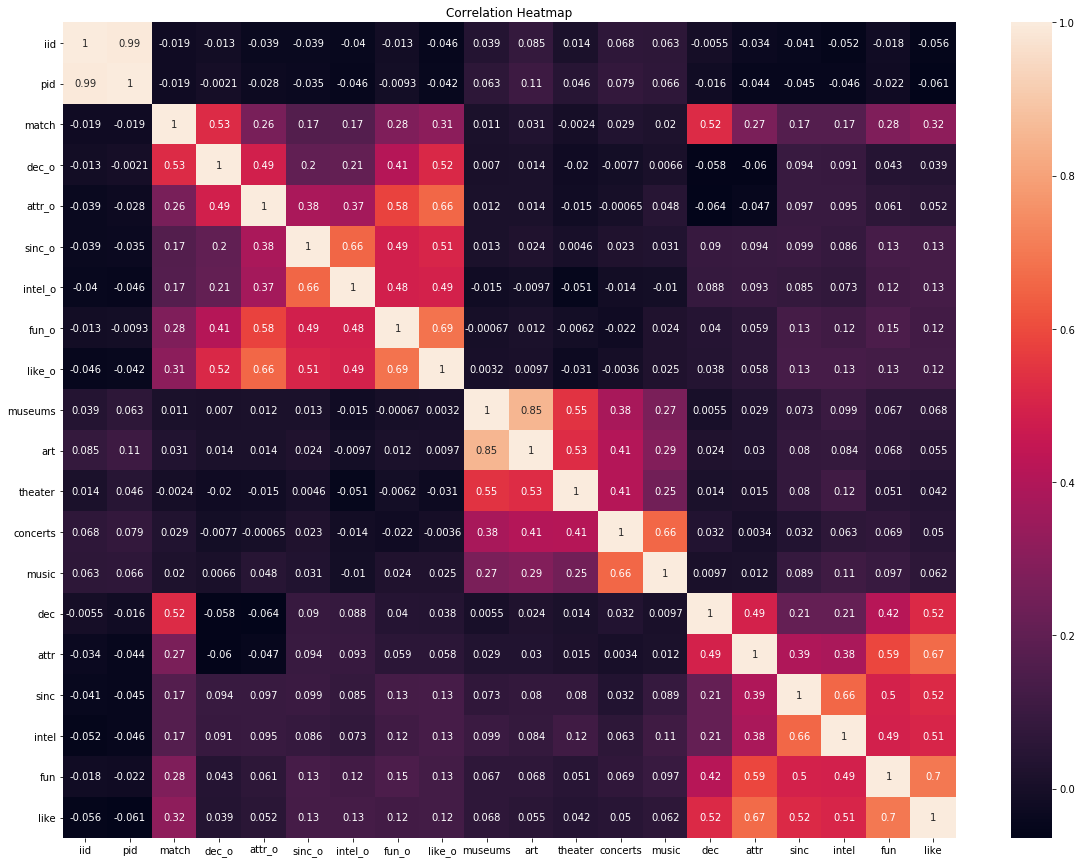

In [31]:
# heatmap on affiche uniquement les variables qui ont une corrélation d'au moins 50% avec un autre variable
plt.subplots(figsize=(20,15))
ax = plt.axes()
ax.set_title("Correlation Heatmap")
corr = date3.corr()
max_corr = [max(abs(a[a!=1])) for a in corr.values]
date4 = date3.iloc[:,[a>0.5 for a in max_corr]]
corr_high = date4.corr()
sns.heatmap(corr_high, 
            xticklabels=corr_high.columns.values,
            yticklabels=corr_high.columns.values,
           annot=True)

In [27]:
corr.match[abs(corr.match)>0.1]

match      1.000000
dec_o      0.525080
attr_o     0.263869
sinc_o     0.167217
intel_o    0.169106
fun_o      0.278102
like_o     0.312442
prob_o     0.260750
met_o     -0.114970
dec        0.524295
attr       0.265760
sinc       0.172255
intel      0.171725
fun        0.280478
like       0.315384
prob       0.265932
Name: match, dtype: float64

In [36]:
# la liste des variables fortement corrélées au match sont listées ci dessus on va appliquer des techniques d'interpolation
# afin de compléter leurs valeurs manquantes
index_corr = corr.match[abs(corr.match)>0.1].index
date_corr = date[index_corr]
# counting null values
date_corr.isnull().sum()


match        0
dec_o        0
attr_o     212
sinc_o     287
intel_o    306
fun_o      360
like_o     250
prob_o     318
met_o      385
dec          0
attr       202
sinc       277
intel      296
fun        350
like       240
prob       309
dtype: int64

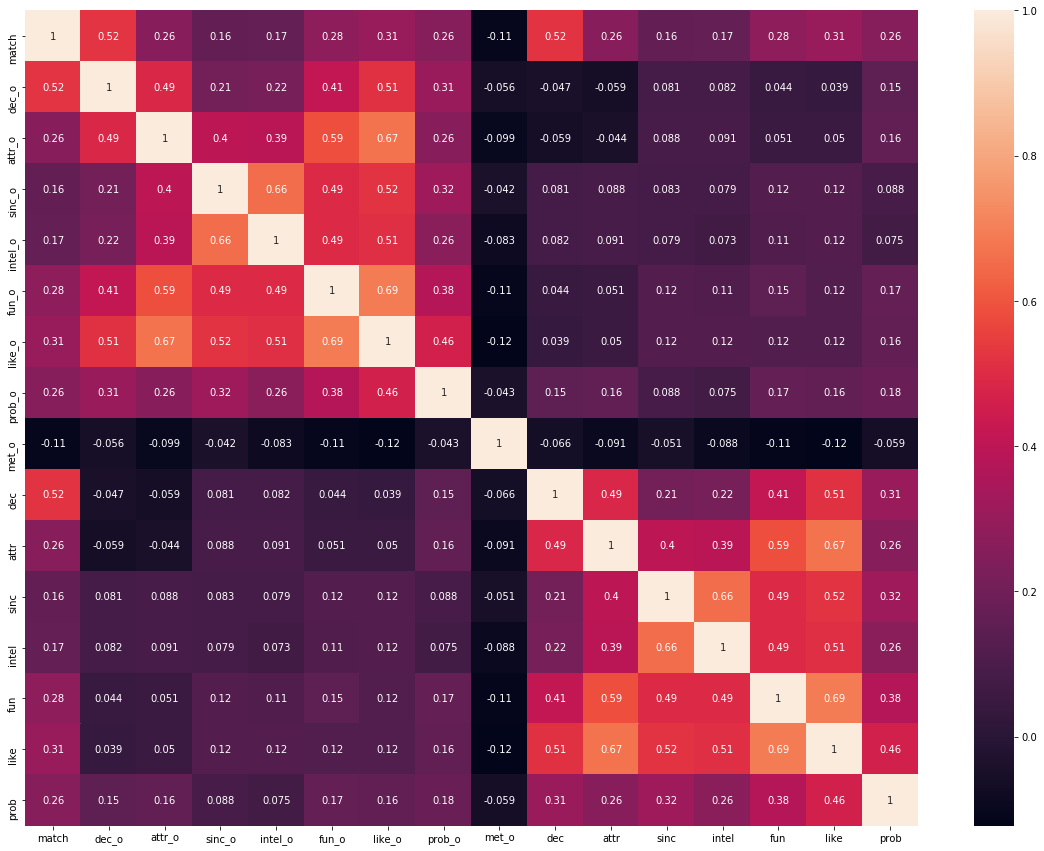

In [39]:
# visualisons la matrice des corrélation de ce nouveau dataset
corr_high = date_corr.corr()
plt.subplots(figsize=(20,15))
sns.heatmap(corr_high, 
            xticklabels=corr_high.columns.values,
            yticklabels=corr_high.columns.values,
           annot=True)

In [37]:
# affichons la variance de chacune de nos variables
date_corr.describe()

match        dec_o       attr_o       sinc_o      intel_o  \
count  8378.000000  8378.000000  8166.000000  8091.000000  8072.000000   
mean      0.164717     0.419551     6.190411     7.175256     7.369301   
std       0.370947     0.493515     1.950305     1.740575     1.550501   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       0.000000     0.000000     5.000000     6.000000     6.000000   
50%       0.000000     0.000000     6.000000     7.000000     7.000000   
75%       0.000000     1.000000     8.000000     8.000000     8.000000   
max       1.000000     1.000000    10.500000    10.000000    10.000000   

             fun_o       like_o       prob_o        met_o          dec  \
count  8018.000000  8128.000000  8060.000000  7993.000000  8378.000000   
mean      6.400599     6.134498     5.208251     1.960215     0.419909   
std       1.954078     1.841258     2.129354     0.245925     0.493573   
min       0.000000     0.000000     0.000000     1.000000     0.000000   
25%       5.000000     5.000000     4.000000     2.000000     0.000000   
50%       7.000000     6.000000     5.000000     2.000000     0.000000   
75%       8.000000     7.000000     7.000000     2.000000     1.000000   
max      11.000000    10.000000    10.000000     8.000000     1.000000   

              attr         sinc        intel          fun         like  \
count  8176.000000  8101.000000  8082.000000  8028.000000  8138.000000   
mean      6.189995     7.175164     7.368597     6.400598     6.134087   
std       1.950169     1.740315     1.550453     1.953702     1.841285   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       5.000000     6.000000     6.000000     5.000000     5.000000   
50%       6.000000     7.000000     7.000000     7.000000     6.000000   
75%       8.000000     8.000000     8.000000     8.000000     7.000000   
max      10.000000    10.000000    10.000000    10.000000    10.000000   

              prob  
count  8069.000000  
mean      5.207523  
std       2.129565  
min       0.000000  
25%       4.000000  
50%       5.000000  
75%       7.000000  
max      10.000000

# Interpolation par la moyenne

C:\Users\charl\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:58: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)


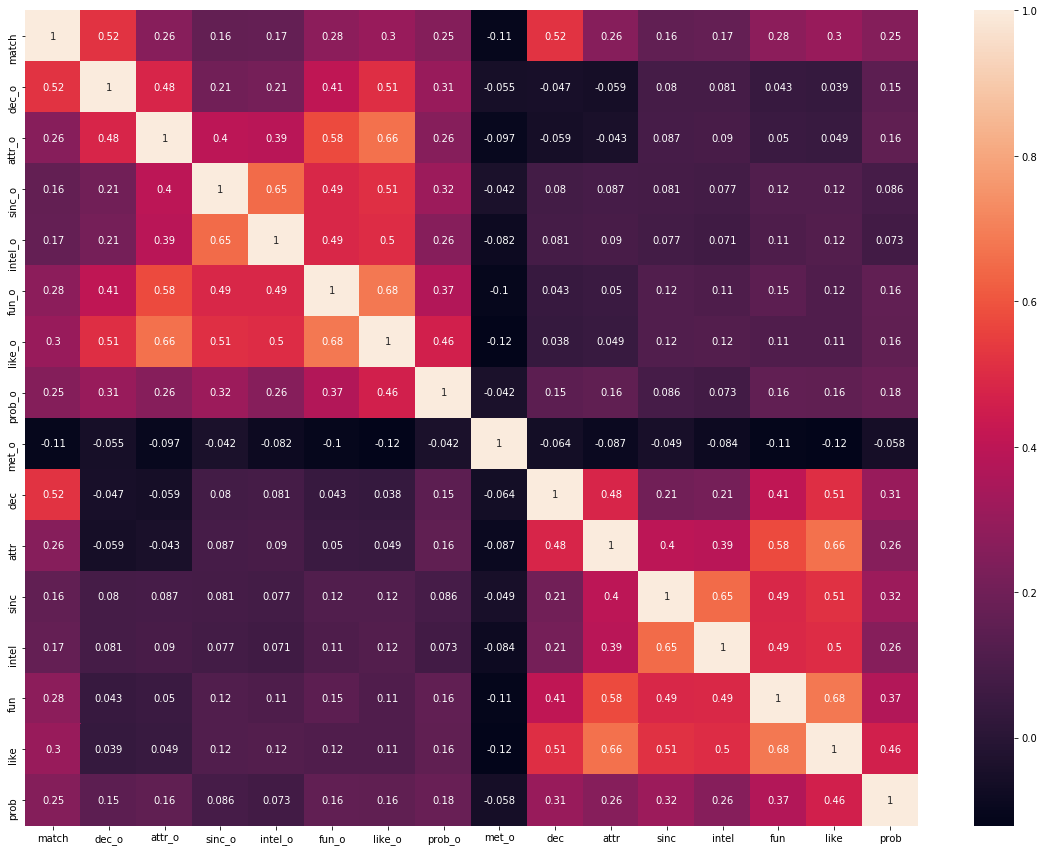

In [34]:
# Interpolation par la moyenne 
from sklearn.preprocessing import Imputer
values = date_corr.values
imputer = Imputer(missing_values='NaN', strategy='mean')
transformed_values = pd.DataFrame(imputer.fit_transform(values), columns=date_corr.columns)
corr_transformed = transformed_values.corr()
plt.subplots(figsize=(20,15))
sns.heatmap(corr_transformed, 
            xticklabels=corr_transformed.columns.values,
            yticklabels=corr_transformed.columns.values,
           annot=True)

In [38]:
transformed_values.describe()

match        dec_o       attr_o       sinc_o      intel_o  \
count  8378.000000  8378.000000  8378.000000  8378.000000  8378.000000   
mean      0.164717     0.419551     6.190411     7.175256     7.369301   
std       0.370947     0.493515     1.925469     1.710499     1.521919   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       0.000000     0.000000     5.000000     6.000000     7.000000   
50%       0.000000     0.000000     6.000000     7.000000     7.369301   
75%       0.000000     1.000000     8.000000     8.000000     8.000000   
max       1.000000     1.000000    10.500000    10.000000    10.000000   

             fun_o       like_o       prob_o        met_o          dec  \
count  8378.000000  8378.000000  8378.000000  8378.000000  8378.000000   
mean      6.400599     6.134498     5.208251     1.960215     0.419909   
std       1.911629     1.813575     2.088547     0.240207     0.493573   
min       0.000000     0.000000     0.000000     1.000000     0.000000   
25%       5.000000     5.000000     4.000000     2.000000     0.000000   
50%       6.400599     6.000000     5.000000     2.000000     0.000000   
75%       8.000000     7.000000     7.000000     2.000000     1.000000   
max      11.000000    10.000000    10.000000     8.000000     1.000000   

              attr         sinc        intel          fun         like  \
count  8378.000000  8378.000000  8378.000000  8378.000000  8378.000000   
mean      6.189995     7.175164     7.368597     6.400598     6.134087   
std       1.926513     1.711300     1.522814     1.912453     1.814717   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       5.000000     6.000000     7.000000     5.000000     5.000000   
50%       6.000000     7.000000     7.368597     6.400598     6.000000   
75%       8.000000     8.000000     8.000000     8.000000     7.000000   
max      10.000000    10.000000    10.000000    10.000000    10.000000   

              prob  
count  8378.000000  
mean      5.207523  
std       2.089919  
min       0.000000  
25%       4.000000  
50%       5.000000  
75%       7.000000  
max      10.000000

# Conclusions de l'interpolation par la moyenne
On note une légère baisse des coefficients de corrélation suite à l'interpollation ainsi qu'une baisse des écarts type pour chacune des variables présentant des valeurs manquantes, ce qui est conforme à nos attentes dans le cas d'une interpolation de ce genre

# Interpolation par régression linéaire

In [82]:
# Interpolation par regression linéaire
"""d'après les analyses précédentes on remarque que la variable fun_o contient 360 valeurs manquantes, procédons
à une interpolation par régression linéaire de cette variable"""
# on commence par sélectionner les variables qui sont le plus corrélées avec fun_o
corr_high = date_corr.corr()
var_fun_o = [(abs(a)>0.3) for a in corr_high.fun_o]
inter_fun_o = date_corr.iloc[:,var_fun_o]

# on élimine toutes les lignes pour lesquelles on a des valeurs manquantes
inter_fun_o.dropna(inplace=True)

# on modélise fun_o en focntion des autres variables grâce à une regression linéaire
y = inter_fun_o['fun_o']
X = inter_fun_o.iloc[:,inter_fun_o.columns!='fun_o']
import statsmodels.regression.linear_model as lm
reglin = lm.OLS(endog=y,exog=X) # on définit une instance du modèle
reglin_fit = reglin.fit() # on entraîne le modèle

fun_o_na = date_corr[date_corr.fun_o.isna()] # on isole les lignes ou fun_o est NA
fun_o_full = date_corr[-date_corr.fun_o.isna()] # on isole le reste

fun_o_na_ols = fun_o_na.iloc[:,var_fun_o]
fun_o_pred = reglin_fit.predict(fun_o_na_ols.iloc[:,fun_o_na_ols.columns!='fun_o']) # on calcule les prédictions pour fun_o
fun_o_na.fun_o = fun_o_pred # on remplace les valeurs manquantes par les prédictions

date_fun_o_full = pd.concat([fun_o_na,fun_o_full])

C:\Users\charl\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # Remove the CWD from sys.path while we load stuff.
C:\Users\charl\Anaconda3\lib\site-packages\pandas\core\generic.py:4401: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


In [84]:
# on analyse maintenant les nouvelles corrélations de fun_o par rapport à ce qu'on avait avant
print(date_corr.corr().fun_o)
print(date_fun_o_full.corr().fun_o)
date_fun_o_full.isnull().sum()

match      0.277700
dec_o      0.414276
attr_o     0.586334
sinc_o     0.491453
intel_o    0.494097
fun_o      1.000000
like_o     0.691267
prob_o     0.380418
met_o     -0.107214
dec        0.044162
attr       0.050925
sinc       0.120728
intel      0.112297
fun        0.151953
like       0.117589
prob       0.167388
Name: fun_o, dtype: float64
match      0.276777
dec_o      0.416011
attr_o     0.588645
sinc_o     0.494176
intel_o    0.496943
fun_o      1.000000
like_o     0.693687
prob_o     0.375232
met_o     -0.105316
dec        0.042539
attr       0.050756
sinc       0.120817
intel      0.110718
fun        0.147206
like       0.116247
prob       0.163929
Name: fun_o, dtype: float64


match        0
dec_o        0
attr_o     212
sinc_o     287
intel_o    306
fun_o      268
like_o     250
prob_o     318
met_o      385
dec          0
attr       202
sinc       277
intel      296
fun        350
like       240
prob       309
dtype: int64

# Conclusion interpolation par régression linéaire
On a pu remplacer une centaine de valeurs manquantes pour la variable fun_o, on observe comme cela est attendu pour ce type d'interpolation une augmentation des coefficients de corrélation (en valeur absolu) entre les variables utilisées pour prédire fun_o et fun_o. On a pas réussi à prédire d'un coup toutes les valeurs manquantes car les variables de prédiction elles même présentent des valeurs manquantes.
On pourrait par exemple sélectionner moins de variables prédictives et sélectionner celles qui présentent le moins de NA en commun avec fun_o. 

# Interpolation multiple

In [113]:
import statsmodels.imputation.mice as mice
var_pred = date_corr.columns[date_corr.columns!='match']
var_target = 'match'
formula = var_target + '~' + '+'.join(var_pred)
mice_ = mice.MICE(formula, lm.OLS, mice.MICEData(date_corr))
mice_fit = mice_.fit()
mice_fit.summary()


C:\Users\charl\Anaconda3\lib\site-packages\pandas\core\indexing.py:189: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


<class 'statsmodels.iolib.summary2.Summary'>
"""
                         Results: MICE
================================================================
Method:                    MICE       Sample size:          8378
Model:                     OLS        Scale                 0.06
Dependent variable:        match      Num. imputations      10  
----------------------------------------------------------------
           Coef.  Std.Err.    t    P>|t|   [0.025  0.975]  FMI  
----------------------------------------------------------------
Intercept -0.0982   0.0308 -3.1894 0.0014 -0.1585 -0.0378 0.0391
dec_o      0.4065   0.0066 61.8374 0.0000  0.3937  0.4194 0.0086
attr_o     0.0080   0.0020  4.1060 0.0000  0.0042  0.0119 0.0109
sinc_o    -0.0005   0.0022 -0.2507 0.8020 -0.0048  0.0037 0.0335
intel_o   -0.0017   0.0024 -0.6982 0.4851 -0.0064  0.0030 0.0250
fun_o      0.0062   0.0020  3.1131 0.0019  0.0023  0.0102 0.0102
like_o    -0.0089   0.0025 -3.5764 0.0003 -0.0138 -0.0040 0.0235
prob_o    -0.0003   0.0015 -0.2212 0.8249 -0.0032  0.0026 0.0263
met_o     -0.0577   0.0113 -5.1032 0.0000 -0.0799 -0.0355 0.0580
dec        0.4051   0.0066 61.6525 0.0000  0.3922  0.4180 0.0078
attr       0.0084   0.0020  4.2817 0.0000  0.0046  0.0123 0.0254
sinc      -0.0006   0.0022 -0.2888 0.7728 -0.0049  0.0036 0.0399
intel     -0.0018   0.0024 -0.7344 0.4627 -0.0065  0.0030 0.0369
fun        0.0063   0.0020  3.0939 0.0020  0.0023  0.0104 0.0507
like      -0.0089   0.0025 -3.5832 0.0003 -0.0137 -0.0040 0.0103
prob      -0.0005   0.0015 -0.3390 0.7346 -0.0034  0.0024 0.0379
================================================================

"""

In [125]:
from statsmodels.tools import add_constant
np.sum((date_corr[var_target] - np.dot(add_constant(date_corr[var_pred]), mice_fit.params))**2)

428.66652504879045

In [126]:
# essayons sans la méthode MICE 
date_corr_full = date_corr.dropna() 
var_pred = date_corr.columns[date_corr.columns!='match']
var_target = 'match'
model = lm.OLS(endog=date_corr_full[var_target], exog=add_constant(date_corr_full[var_pred]))
model_fit = model.fit()
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  match   R-squared:                       0.590
Model:                            OLS   Adj. R-squared:                  0.589
Method:                 Least Squares   F-statistic:                     692.3
Date:                Sun, 10 Mar 2019   Prob (F-statistic):               0.00
Time:                        16:09:19   Log-Likelihood:                -38.057
No. Observations:                7231   AIC:                             108.1
Df Residuals:                    7215   BIC:                             218.3
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.1186      0.033     -3.578      0.000      -0.184      -0.054
dec_o          0.4191      0.007     58.998      0.000       0.405       0.433
attr_o         0.0083      0.002      3.904      0.000       0.004       0.012
sinc_o        -0.0012      0.002     -0.513      0.608      -0.006       0.003
intel_o       -0.0015      0.003     -0.595      0.552      -0.007       0.004
fun_o          0.0075      0.002      3.412      0.001       0.003       0.012
like_o        -0.0092      0.003     -3.410      0.001      -0.015      -0.004
prob_o        -0.0003      0.002     -0.179      0.858      -0.003       0.003
met_o         -0.0569      0.012     -4.748      0.000      -0.080      -0.033
dec            0.4199      0.007     59.093      0.000       0.406       0.434
attr           0.0082      0.002      3.841      0.000       0.004       0.012
sinc          -0.0004      0.002     -0.175      0.861      -0.005       0.004
intel         -0.0023      0.003     -0.899      0.369      -0.007       0.003
fun            0.0069      0.002      3.164      0.002       0.003       0.011
like          -0.0089      0.003     -3.297      0.001      -0.014      -0.004
prob          -0.0002      0.002     -0.138      0.891      -0.003       0.003
==============================================================================
Omnibus:                       46.285   Durbin-Watson:                   1.911
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              966.478
Skew:                           0.198   Prob(JB):                    1.36e-210
Kurtosis:                       1.253   Cond. No.                         275.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [127]:
np.sum((date_corr[var_target] - np.dot(add_constant(date_corr[var_pred]), model_fit.params))**2)

427.85383457224924

# Conclusions de l'interpolation multiple
Dans le cas présent il semble que le modèle établi sur la base des données complètes et celui établi par la méthode d'interpolation multiple ont des performances similaires sur les données complètes


# K nearest neighbours

In [140]:
import numpy as np
import pandas as pd
from collections import defaultdict
from scipy.stats import hmean
from scipy.spatial.distance import cdist
from scipy import stats
import numbers

'''On créé une fonction qui trouve les valeurs manquantes grace au voisins les plus proches'''

def weighted_hamming(data):
    """ Compute weighted hamming distance on categorical variables. For one variable, it is equal to 1 if
        the values between point A and point B are different, else it is equal the relative frequency of the
        distribution of the value across the variable. For multiple variables, the harmonic mean is computed
        up to a constant factor.
        @params:
            - data = a pandas data frame of categorical variables
        @returns:
            - distance_matrix = a distance matrix with pairwise distance for all attributes
    """
    categories_dist = []
    
    for category in data:
        X = pd.get_dummies(data[category])
        X_mean = X * X.mean()
        X_dot = X_mean.dot(X.transpose())
        X_np = np.asarray(X_dot.replace(0,1,inplace=False))
        categories_dist.append(X_np)
    categories_dist = np.array(categories_dist)
    distances = hmean(categories_dist, axis=0)
    return distances


def distance_matrix(data, numeric_distance = "euclidean", categorical_distance = "jaccard"):
    """ Compute the pairwise distance attribute by attribute in order to account for different variables type:
        - Continuous
        - Categorical
        For ordinal values, provide a numerical representation taking the order into account.
        Categorical variables are transformed into a set of binary ones.
        If both continuous and categorical distance are provided, a Gower-like distance is computed and the numeric
        variables are all normalized in the process.
        If there are missing values, the mean is computed for numerical attributes and the mode for categorical ones.
        
        Note: If weighted-hamming distance is chosen, the computation time increases a lot since it is not coded in C 
        like other distance metrics provided by scipy.
        @params:
            - data                  = pandas dataframe to compute distances on.
            - numeric_distances     = the metric to apply to continuous attributes.
                                      "euclidean" and "cityblock" available.
                                      Default = "euclidean"
            - categorical_distances = the metric to apply to binary attributes.
                                      "jaccard", "hamming", "weighted-hamming" and "euclidean"
                                      available. Default = "jaccard"
        @returns:
            - the distance matrix
    """
    possible_continuous_distances = ["euclidean", "cityblock"]
    possible_binary_distances = ["euclidean", "jaccard", "hamming", "weighted-hamming"]
    number_of_variables = data.shape[1]
    number_of_observations = data.shape[0]

    # Get the type of each attribute (Numeric or categorical)
    is_numeric = [all(isinstance(n, numbers.Number) for n in data.iloc[:, i]) for i, x in enumerate(data)]
    is_all_numeric = sum(is_numeric) == len(is_numeric)
    is_all_categorical = sum(is_numeric) == 0
    is_mixed_type = not is_all_categorical and not is_all_numeric

    # Check the content of the distances parameter
    if numeric_distance not in possible_continuous_distances:
        print("The continuous distance " + numeric_distance + " is not supported.")
        return None
    elif categorical_distance not in possible_binary_distances:
        print( "The binary distance " + categorical_distance + " is not supported.")
        return None

    # Separate the data frame into categorical and numeric attributes and normalize numeric data
    if is_mixed_type:
        number_of_numeric_var = sum(is_numeric)
        number_of_categorical_var = number_of_variables - number_of_numeric_var
        data_numeric = data.iloc[:, is_numeric]
        data_numeric = (data_numeric - data_numeric.mean()) / (data_numeric.max() - data_numeric.min())
        data_categorical = data.iloc[:, [not x for x in is_numeric]]

    # Replace missing values with column mean for numeric values and mode for categorical ones. With the mode, it
    # triggers a warning: "SettingWithCopyWarning: A value is trying to be set on a copy of a slice from a DataFrame"
    # but the value are properly replaced
    if is_mixed_type:
        data_numeric.fillna(data_numeric.mean(), inplace=True)
        for x in data_categorical:
            data_categorical[x].fillna(data_categorical[x].mode()[0], inplace=True)
    elif is_all_numeric:
        data.fillna(data.mean(), inplace=True)
    else:
        for x in data:
            data[x].fillna(data[x].mode()[0], inplace=True)

    # "Dummifies" categorical variables in place
    if not is_all_numeric and not (categorical_distance == 'hamming' or categorical_distance == 'weighted-hamming'):
        if is_mixed_type:
            data_categorical = pd.get_dummies(data_categorical)
        else:
            data = pd.get_dummies(data)
    elif not is_all_numeric and categorical_distance == 'hamming':
        if is_mixed_type:
            data_categorical = pd.DataFrame([pd.factorize(data_categorical[x])[0] for x in data_categorical]).transpose()
        else:
            data = pd.DataFrame([pd.factorize(data[x])[0] for x in data]).transpose()

    if is_all_numeric:
        result_matrix = cdist(data, data, metric=numeric_distance)
    elif is_all_categorical:
        if categorical_distance == "weighted-hamming":
            result_matrix = weighted_hamming(data)
        else:
            result_matrix = cdist(data, data, metric=categorical_distance)
    else:
        result_numeric = cdist(data_numeric, data_numeric, metric=numeric_distance)
        if categorical_distance == "weighted-hamming":
            result_categorical = weighted_hamming(data_categorical)
        else:
            result_categorical = cdist(data_categorical, data_categorical, metric=categorical_distance)
        result_matrix = np.array([[1.0*(result_numeric[i, j] * number_of_numeric_var + result_categorical[i, j] *
                               number_of_categorical_var) / number_of_variables for j in range(number_of_observations)] for i in range(number_of_observations)])

    # Fill the diagonal with NaN values
    np.fill_diagonal(result_matrix, np.nan)

    return pd.DataFrame(result_matrix)


def knn_impute(target, attributes, k_neighbors, aggregation_method="mean", numeric_distance="euclidean",
               categorical_distance="jaccard", missing_neighbors_threshold = 0.5):
    """ Replace the missing values within the target variable based on its k nearest neighbors identified with the
        attributes variables. If more than 50% of its neighbors are also missing values, the value is not modified and
        remains missing. If there is a problem in the parameters provided, returns None.
        If to many neighbors also have missing values, leave the missing value of interest unchanged.
        @params:
            - target                        = a vector of n values with missing values that you want to impute. The length has
                                              to be at least n = 3.
            - attributes                    = a data frame of attributes with n rows to match the target variable
            - k_neighbors                   = the number of neighbors to look at to impute the missing values. It has to be a
                                              value between 1 and n.
            - aggregation_method            = how to aggregate the values from the nearest neighbors (mean, median, mode)
                                              Default = "mean"
            - numeric_distances             = the metric to apply to continuous attributes.
                                              "euclidean" and "cityblock" available.
                                              Default = "euclidean"
            - categorical_distances         = the metric to apply to binary attributes.
                                              "jaccard", "hamming", "weighted-hamming" and "euclidean"
                                              available. Default = "jaccard"
            - missing_neighbors_threshold   = minimum of neighbors among the k ones that are not also missing to infer
                                              the correct value. Default = 0.5
        @returns:
            target_completed        = the vector of target values with missing value replaced. If there is a problem
                                      in the parameters, return None
    """

    # Get useful variables
    possible_aggregation_method = ["mean", "median", "mode"]
    number_observations = len(target)
    is_target_numeric = all(isinstance(n, numbers.Number) for n in target)

    # Check for possible errors
    if number_observations < 3:
        print( "Not enough observations.")
        return None
    if attributes.shape[0] != number_observations:
        print( "The number of observations in the attributes variable is not matching the target variable length.")
        return None
    if k_neighbors > number_observations or k_neighbors < 1:
        print( "The range of the number of neighbors is incorrect.")
        return None
    if aggregation_method not in possible_aggregation_method:
        print( "The aggregation method is incorrect.")
        return None
    if not is_target_numeric and aggregation_method != "mode":
        print( "The only method allowed for categorical target variable is the mode.")
        return None

    # Make sure the data are in the right format
    target = pd.DataFrame(target)
    attributes = pd.DataFrame(attributes)

    # Get the distance matrix and check whether no error was triggered when computing it
    distances = distance_matrix(attributes, numeric_distance, categorical_distance)
    if distances is None:
        return None

    # Get the closest points and compute the correct aggregation method
    for i, value in enumerate(target.iloc[:, 0]):
        if pd.isnull(value):
            order = distances.iloc[i,:].values.argsort()[:k_neighbors]
            closest_to_target = target.iloc[order, :]
            missing_neighbors = [x for x  in closest_to_target.isnull().iloc[:, 0]]
            # Compute the right aggregation method if at least more than 50% of the closest neighbors are not missing
            if sum(missing_neighbors) >= missing_neighbors_threshold * k_neighbors:
                continue
            elif aggregation_method == "mean":
                target.iloc[i] = np.ma.mean(np.ma.masked_array(closest_to_target,np.isnan(closest_to_target)))
            elif aggregation_method == "median":
                target.iloc[i] = np.ma.median(np.ma.masked_array(closest_to_target,np.isnan(closest_to_target)))
            else:
                target.iloc[i] = stats.mode(closest_to_target, nan_policy='omit')[0][0]

    return target

In [142]:
pred = knn_impute(target=date_corr['fun_o'], attributes=date_corr.drop(['fun_o', 'match'], 1),
                                    aggregation_method="median", k_neighbors=10, numeric_distance='euclidean',
                                    categorical_distance='hamming', missing_neighbors_threshold=0.8)
pred.isnull().sum()

fun_o    134
dtype: int64

In [143]:
date_corr['fun_o'] = pred

C:\Users\charl\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


# Conclusion KNN
Grâce aux KNN on a pu remplacer 230 valeurs manquantes pour la variable fun_o, les cas restants devront être éliminés car ils signifient qu'aucune autre variable préselectionnée n'était renseignées pour ces observations.